Shape: (344, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB

Summary statistics:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000



Missing values:


,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11



Missing after cleaning:


/tmp/ipython-input-2850421911.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["sex"] = df_clean["sex"].fillna("Unknown")


,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


/tmp/ipython-input-2850421911.py:77: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


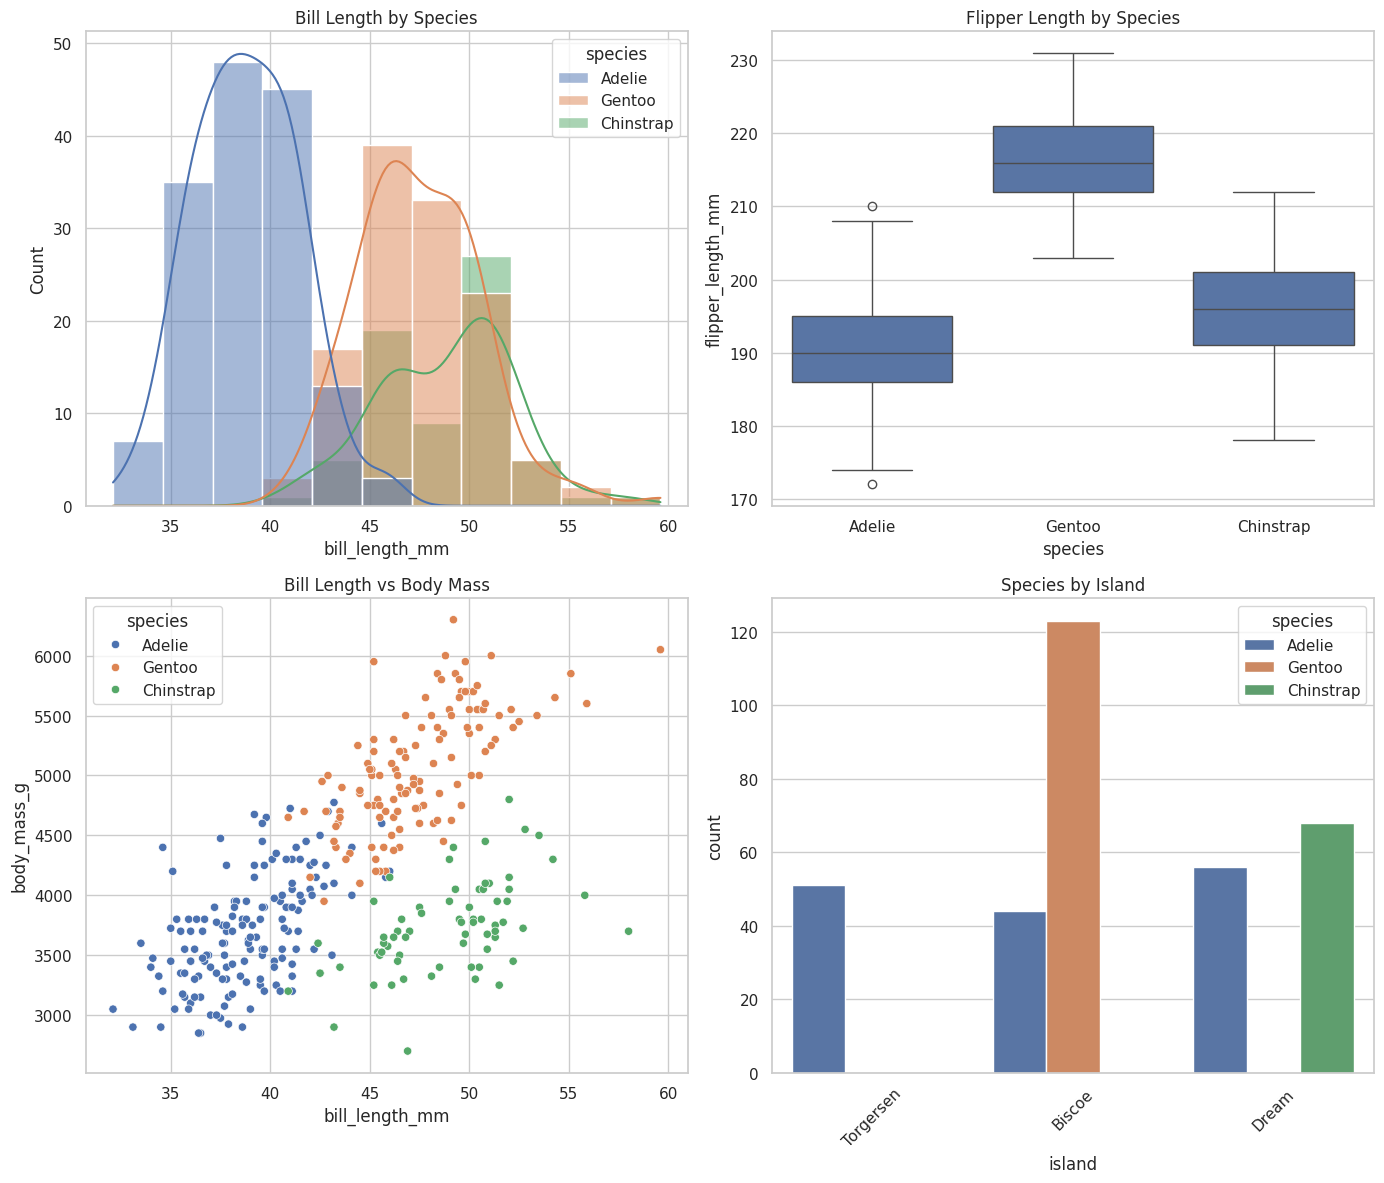

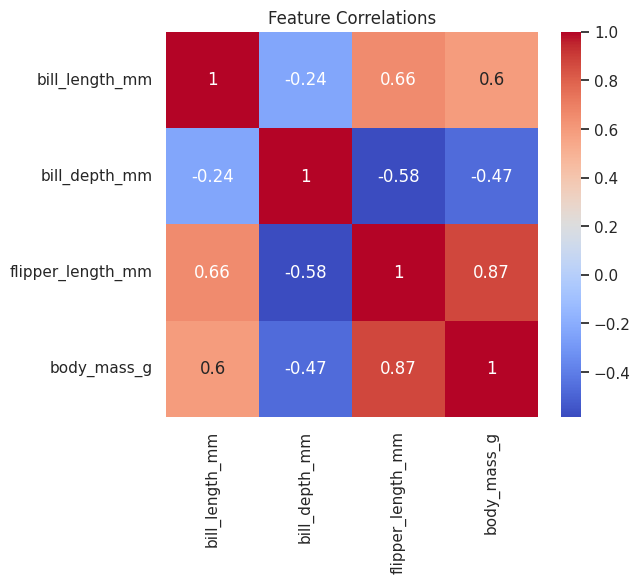

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load data
df = pd.read_csv("penguins (1).csv")

# ===============================
# Basic EDA
# ===============================
print("Shape:", df.shape)
print("\nInfo:")
df.info()

print("\nSummary statistics:")
display(df.describe())

print("\nMissing values:")
display(df.isna().sum())

# ===============================
# Data cleaning
# ===============================
df_clean = df.dropna(subset=[
    "bill_length_mm",
    "flipper_length_mm",
    "body_mass_g"
])

df_clean["sex"] = df_clean["sex"].fillna("Unknown")

print("\nMissing after cleaning:")
display(df_clean.isna().sum())

# ===============================
# Visualizations
# ===============================
fig, ax = plt.subplots(2, 2, figsize=(14, 12), constrained_layout=True)

sns.histplot(
    data=df_clean,
    x="bill_length_mm",
    hue="species",
    kde=True,
    ax=ax[0, 0]
)
ax[0, 0].set_title("Bill Length by Species")

sns.boxplot(
    data=df_clean,
    x="species",
    y="flipper_length_mm",
    ax=ax[0, 1]
)
ax[0, 1].set_title("Flipper Length by Species")

sns.scatterplot(
    data=df_clean,
    x="bill_length_mm",
    y="body_mass_g",
    hue="species",
    ax=ax[1, 0]
)
ax[1, 0].set_title("Bill Length vs Body Mass")

sns.countplot(
    data=df_clean,
    x="island",
    hue="species",
    ax=ax[1, 1]
)
ax[1, 1].set_title("Species by Island")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# ===============================
# Bonus: Correlation heatmap
# ===============================
corr = df_clean[
    ["bill_length_mm", "bill_depth_mm",
     "flipper_length_mm", "body_mass_g"]
].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()


In [4]:
### Key Insights

| Observation | Implication |
|------------|------------|
| Gentoo penguins have higher body mass and longer flippers | Gentoo penguins are physically larger than other species |
| Bill length and body mass are positively correlated | Larger penguins tend to have longer bills |
| Penguin species are concentrated on specific islands | Island location strongly predicts species |


SyntaxError: invalid syntax (ipython-input-2860695272.py, line 3)